In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt


This is programming assignment for week 2. In this assignment you will be implementing gradient descent and weighted linear regression from scratch. 

Please, read all the notebook carefully and make sure that you understand not only the task, but the whole pipeline.

### Grading
The assignment is automatically graded. 

**Automatic grading**
After you finish solving all the tasks restart the kernel (`kernel -> restart`) and click the button `Validate` to check that everything works as expected. Afterwards, you can submit your work.


# Table of Contents:
* [Problem 1.](#part1)  Gradient Descent
     - [Task 1](#task1) [2 pts]
     - [Task 2](#task2) [3 pts]
     - [Task 3](#task3) [1 pts]
     - [Task 4](#task4) [1 pt]

   
* [Problem 2](#part2). Weighted Linear Regression
    - [Task 1](#task2_1) [1 pts]
    - [Task 2](#task2_2) [1 pts]
    - [Task 3](#task2_3) [1 pts]





---
## Problem 1. Gradient Descent  <a class="anchor" id="part1"></a>
---


In [2]:
def plot_function(f, x_min=-10, x_max=10):
    """
    Plot 2d function within specified range
    """
    x_grid = np.linspace(x_min, x_max,  500)
    plt.plot(x_grid, f(x_grid))
    plt.grid();

---
**Task 1.1** [2 pts] <a class="anchor" id="task1"></a>

Consider a function $$f(x) = x^2 - 15\sin \left(\tfrac{\pi}{3}x\right).$$ 

Implement funtions `f(x)` and `grad_f(x)`, which evaluate function and its gradient in any given point `x`. 

In [3]:
def f(x):
    """
    Evaluates function `f(x) = x^2 - 15 \sin(x * \pi/3)`
    
    Parameters
    ----------
    x : array_like
        Input(s) to the function
        
    Returns
    -------
    out : ndarray
        Function `f`, evaluated at point(s) x
    """
    
    # YOUR CODE HERE
    return x * x - 15 * np.sin(np.pi / 3 * x)

    
def grad_f(x):
    """
    Evaluates gradient of a function `f(x) = x^2 - 15 \sin(x * \pi/3)`
    
    Parameters
    ----------
    x : array_like
        Point(s) at which gradient should be avalueated
        
    Returns
    -------
    out : ndarray
        Gradient of the function `f` evaluaed at point(s) x
    """
    
    # YOUR CODE HERE
    return 2 * x - 15 * np.cos(np.pi / 3 * x) * np.pi / 3

In [4]:
# TEST f
assert f(0.) == 0.
assert np.allclose(f(np.array([2.5, 7.5])), np.array([-1.25, 41.25]))

assert np.allclose(f(np.arange(-10, 10, 1)), np.arange(-10, 10, 1)**2 - 15*np.sin(np.pi/3*np.arange(-10, 10, 1)))
x_min = 1.33668375
assert np.allclose(f(x_min), -12.9944407)

In [5]:
# TEST grad_f
assert np.allclose(grad_f(0.), -15.7079)
assert isinstance(grad_f(0.), float)

assert np.allclose(grad_f(0), - 5*np.pi*np.cos(0)), 'Gradient at point 0 is wrong'
assert np.allclose(grad_f(np.arange(-10, 10, 1)), 2*np.arange(-10, 10, 1) - 5*np.pi*np.cos(np.pi/3*np.arange(-10, 10, 1)))
x_min = 1.33668375
assert np.allclose(grad_f(x_min), 0, atol=1e-05)

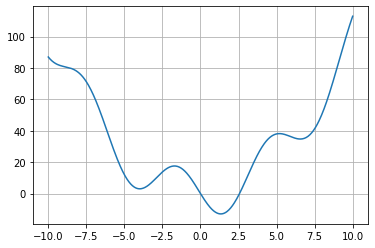

In [6]:
plot_function(f)

---
We start with a base class for the gradient descent algorithm. Recall that gradient descent can be used to find a local minimum of a function $f(x)$

The algorithm is the following:

* Choose initial point $x_0$
* Make steps in the direction of the anti-gradient
$$
x_{t+1} = x_t - \nu \nabla f(x_t), \\
$$
* Repeat until stopping criterion is satisfied. Possible stopping criterions are:
    - $\|x_{t+1} - x_t\| < \varepsilon$
    - $\|\nabla f(x_{t+1})\| < \varepsilon$
    
**Task 1.2** [3 pts] <a class="anchor" id="task2"></a>

Implement the following methods in the class below:
* `step`, which makes one step of the gradient descent algorithm 
* `stoppin_criterion`, we will use the first option, i.e. $\|x_{t+1} - x_t\| < \varepsilon$
* `find_min`, which finds local minimum of a functions

In [7]:
class BaseGD:
    """
    Gradient descent algorithm with constant learning rate.
    On each iteration algorithm makes a step in the direction of the anti-gradeint.
    If stopping criterion is statified


    Attributes
    ----------
    fn : callable
        Evaluates the target function
    grad_fn : callable
        Evaluates gradient of the target function
    lr: float
        Learning rate
    """
    
    def __init__(self, fn, grad_fn, lr=1e-2):
        self.fn = fn
        self.grad_fn = grad_fn
        self.lr = lr
        self.hist = []
        
    def get_lr(self):
        """
        Returns learning rate for a given iteration. In the base version the lr is constant
            
        Returns
        ----------
        out: float
            Learning rate for a current iteration
        """
        return self.lr
        
    def step(self, x):
        """
        Makes one step of the GD: evaluates gradient in the current point 
        and makes step in the opposite direction with learning rate defined in the method `get_lr`
        
        Parameters
        ----------
        x: array_like
            Current point
            
        Returns
        ----------
        out: ndarray
            Next point
        """
        # YOUR CODE HERE
        return x - self.lr * self.grad_fn(x)
        
    def stoppin_criterion(self, x_old, x_new, eps):
        """
        Test if the stopping criterion is statisfied 
        
        Parameters
        ----------
        x_old: array_like
            Current point
        x_new: array_like
            Next point
        eps: float
            Tolerance level
            
        Returns
        ----------
        out: bool
            If True, then no more steps should be done
        """
        # YOUR CODE HERE
        if np.abs(x_new - x_old) < eps:
            return True
        return False
        
    def find_min(self, x_0, max_iter=int(1e3), eps=1e-4):
        """
        Performs gradient descent starting from x_0. 
        On each iteration it 
         - makes step using `self.step`
         - saves new point to the history
         - check stopping criterion. If it is statisfied, stop and return last point from the history
        
        Return
        ----------
        out: tuple
            Local minimum found by GD and the value of target function
        """
        self.hist = [x_0]
        for _ in range(max_iter):
            # YOUR CODE HERE
            self.hist.append(self.step(self.hist[_]))
            if self.stoppin_criterion(self.hist[_], self.hist[_+1], eps):
                break
        return self.hist[-1], self.fn(self.hist[-1])

In [8]:
# TEST step()

# create test functions and initi GD
test_f = lambda x: x ** 4
test_grad_f = lambda x: 4 * x ** 3
my_gd = BaseGD(test_f, test_grad_f, lr=0.1)

x_step_l = my_gd.step(-1.)
assert np.allclose(x_step_l, -0.6), 'Check your `step` method'


prenabla = lambda x: x ** 3
nabla = lambda x: 3 * x ** 2
my_gd = BaseGD(prenabla, nabla, lr=0.1)
x_step_l = my_gd.step(-1.)
x_step_r = my_gd.step(1.)
assert np.allclose(x_step_l, -1.3),  'Check your `step` method'
assert np.allclose(x_step_r, 0.7),  'Check your `step` method'
assert(np.allclose(x_step_l - x_step_r, -2., atol=1e-3)),  'Check your `step` method'

In [9]:
# TEST stoppin_criterion()
test_f = lambda x: x ** 4
test_grad_f = lambda x: 4 * x ** 3

my_gd = BaseGD(test_f, test_grad_f, lr=0.1)
eps = 1e-3

left = my_gd.stoppin_criterion(-1., 1., eps)
assert ~left, 'Check your `stoppin_criterion` method'


test_f = lambda x: x ** 4
test_grad_f = lambda x: 4 * x ** 3

my_gd = BaseGD(prenabla, nabla, lr=0.1)
eps = 1e-3
left = my_gd.stoppin_criterion(-1. + eps, 1., eps)
assert ~left, 'Check your `stoppin_criterion` method'

right = my_gd.stoppin_criterion(1., -1+eps, eps)
assert ~right, 'Check your `stoppin_criterion` method'
assert(left == right), 'Check your `stoppin_criterion` method'

In [10]:
# TEST find_min()
test_f = lambda x: x ** 2
test_grad_f = lambda x: 2 * x
my_gd = BaseGD(test_f, test_grad_f, lr=0.1)
x_min, _ = my_gd.find_min(x_0=.5)
assert(np.allclose(x_min, 0.0, atol=1e-3)), 'GD does not coverge to the minimum, check your `find_min` method'


prenabla = lambda x: (x - 5.) ** 2
nabla = lambda x: 2 * (x - 5.)
my_gd = BaseGD(prenabla, nabla, lr=0.1)
x_min, _ = my_gd.find_min(x_0=.5)
assert(np.allclose(x_min, 5.0, atol=1e-3)), 'GD does not coverge to the minimum, check your `find_min` method'

In [11]:
def plot_history(fn, history):
    N_steps = len(history)
    assert N_steps > 1
    
    # plot all the points
    plt.scatter(history, fn(np.array(history)), 
                c='red', s=40, lw=0, alpha=0.5);

    # draw the arrows
    for j in range(1, N_steps):
        plt.annotate('', xy=[history[j], fn(history[j])],  xytext=[history[j-1], fn(history[j-1])], 
                     arrowprops={'arrowstyle': '-', 'color': 'r', 'lw': 1, 'alpha':0.8},
                     va='center', ha='center')



**Task 1.3** [1 pt] <a class="anchor" id="task3"></a>

Now it is time to use our algorithm. Assume that the starting point is fixed $x_0 = 9$. Your task is to tune hyperparameters of the method, so that it coverges to a **global** minimum (or to the point wich is close enough to the global minimum). Value of the target function in the obtained point should smaller that `-12.5`. You can tune different parameters:
- learning rate (`lr`)
- maximal number of iterations (`max_iter`)
- tolerance of the stopping criterion (`eps`)

Please, fill in the function `find_global_opt`, where you should create instance of the BaseGD class, call method `find_min` and returns instance of `BaseGD`. 

Below is an example of how the solution may look like:
```
def find_global_opt():
    gd = BaseGD(f, grad_f)
    x_min, f_min = gd.find_min(x_0)
    return gd
```



In [12]:
x_0 = 9 # !! do not change starting point

 
def find_global_opt():
    """
    Defines optimal hyperparameter for, runs gd and returns the instance of the correcponding class
    """
    # YOUR CODE HERE
    gd = BaseGD(f, grad_f, lr=0.2)
    x_min, f_min = gd.find_min(x_0, max_iter=int(1e3), eps=1e-1)
    return gd

Below you can visually test that the obtained solution is close to global minima (it is only for you to check youself visually, the plot will not be checked)

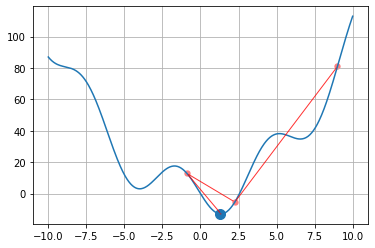

In [13]:
# plot the initial function
plot_function(f)

# get instance of the gd class an plot its history
gd = find_global_opt()
plot_history(f, gd.hist)

# extract last point from the history and plot
x_min = gd.hist[-1]
f_min = gd.fn(x_min)
plt.scatter(x_min, f_min, s=100);

In [14]:
# TEST find_global_opt
gd = find_global_opt()
print('x_min = {:.2f}'.format(gd.hist[-1]))
print('f(x_min) = {:.2f}'.format(gd.fn(gd.hist[-1])))


gd = find_global_opt()
x_min = gd.hist[-1]

# test that fun value is small enough
assert gd.fn(x_min) <= -12.5, 'Value of the function is larger than -12.5'

# Test that history is proper 
assert gd.hist[0] == 9, 'Starting point is not 9'
assert gd.step(gd.hist[-2]) == gd.hist[-1], 'History is not proper'

x_min = 1.29
f(x_min) = -12.98


---
**Task 1.4** [1 point] <a class="anchor" id="task4"></a>

You've probably noticed that it is not easy to select proper learning rate for all the iterations. Let us now make the learning rate dependent on the step number.  

$$
x_{t+1} = x_t - \nu_t \nabla f(x_t), \\
\nu_t = \frac{\nu_0}{t}
$$

Where $\nu_0$ is the initial value and it is reduced with a constant speed. 

In [15]:
class LRStepGD(BaseGD):
    def __init__(self, fn, grad_fn, start_lr):
        super().__init__(fn, grad_fn, start_lr)
        
    def get_lr(self):
        """
        Returns learning rate for a given iteration using formula $\nu_t = \nu_0* 1/t
        Note that number of the current iteration can be extracted from the list with the history
            
        Returns
        ----------
        out: float
            Learning rate for a current iteration
        """
        # YOUR CODE HERE
        if len(self.hist) == 0:
            return self.lr
        return self.lr / len(self.hist)

In [16]:
### TEST get_lr
prenabla = lambda: x ** 2
nabla = lambda: 2 * x
lr0 = 1e-1
test_gd = LRStepGD(prenabla, nabla, lr0)
assert(test_gd.get_lr() == lr0), 'Method `get_lr` should return initial learning rate on the first iteration'


You can now try different starting points and initial learing rate. Check that it is easier to reach global optimum, because you can set large enough initial learing rate to jump over local minima.

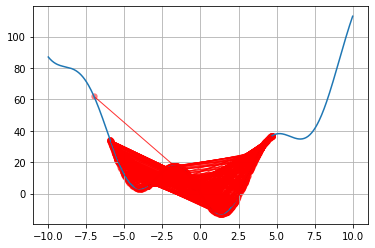

In [17]:
x_0 = -7 # Try changing inital point
start_lr = 0.3 # and initial learing learning rate

gd = LRStepGD(f, grad_f, start_lr)
x_min, f_min = gd.find_min(x_0)

# draw plots
plot_function(f)
plot_history(f, gd.hist)
plt.scatter(x_min, f_min, s=100);

---
## Problem 2. Weighted Linear Regression <a class="anchor" id="part2"></a>
---

### Linear Regression Recap

In simple linear regression we have assumed that all the observations are of the same 'importance' to the model. In practice it is not always the case. Due to different reasons, it may happen that some observations are more valuable for us than others. In this problem we will see, how we can take into account such infomation.

Let us start with recapping the simple linear regression.

* **Model** with k features:
$$
a(x) = w_0 + w_1x^1 + \dots w_kx^k = \langle w, x \rangle,\\
x = (1, x^1, \dots, x^k)
$$

* **Dataset:** 
$$\text{design matrix } X \in \mathbb{R}^{N \times k+1},\\
\text{target values }y \in \mathbb{R}^{N}$$

* **MSE Loss**:
$$
L = \tfrac{1}{N}\| y - Xw\|^2_2
$$

We obtained the matrix form of the MSE loss inthe following manner:


$$
L(a, X) = \frac{1}{N}\sum_{i=1}^N (y_i -  a(x_i))^2 =  \frac{1}{N}\sum_{i=1}^N (y_i -  \langle w, x_i \rangle)^2 =  \frac{1}{N}(y - Xw)^T(y - Xw) =  \frac{1}{N} \| y - Xw\|^2_2
$$


From the lecture you know that in this case optimal parameters (that minimize the loss function) can be written in a closed-form:

$$
\hat{w} = \left(X^T X\right)^{-1}X^Ty
$$


### Weighted Linear Regression
Assume now, that some observations in our dataset are more "important" that others. E.g. we know that for some points the measurements are less accurate and want to reduce the weight of such observation. Another possible reason: we assume more recent observations to be more relevant and want to account for that in our loss function. 

* The **model**  (exactly the same):
$$
a(x) = w_0 + w_1x^1 + \dots w_kx^k
$$

* The **dataset**: 
$$\text{design matrix } X \in \mathbb{R}^{N \times k+1},\\
\text{target values }y \in \mathbb{R}^{N}$$

In addition, we have vector of weights, which reflects the importance of each observation:
$$v = (v_1, \dots, v_N)$$ 

* **MSE loss**:

We will change loss function, so that it includes the weights:
$$
L(a, X) = \frac{1}{N}\sum_{i=1}^N v_i(y_i -  a(x_i))^2
$$

In the matrix form, it will looks like this:
$$
L(a, X) =  \tfrac{1}{N}\| V^{1/2}(y - Xw)\|^2_2
$$

Where $V$ is matrix with weight $v$ on the diagonal and zeros elsewhere:

$$
V = \begin{pmatrix}
v_1 & 0 & \cdots & 0\\
0  & v_2 & \cdots & 0 \\
\vdots & \vdots & \ddots& \vdots \\
0 & 0 & \cdots & v_n
\end{pmatrix}
$$

In this task we will train weighted linear regression using both closed form solution and gradient descent algorithm

---
**Task 2.1** [1 pt]  <a class="anchor" id="task2_1"></a>

Calculate gradient of the weighted MSE loss with respect to parameters for the model

$$
\nabla_w L =  \nabla_w \tfrac{1}{N}\| V^{1/2}(y - Xw)\|^2 = ?
$$

**Hints:** You can use formulas from the lecture. 

Given vector $x \in \mathbb{R}^n$ and matrix $A \in \mathbb{R}^{k \times n}$
$$
\nabla_x \| x\|^2_2 = 2x
$$

$$
\nabla_x Ax = A^T
$$

Using the formula frm the gradient, implement the function `weighted_mse_grad`, which calculates gradient for any given vector $w$.  

In [18]:
def weighted_mse_grad(w, X, y, V):
    """
    Calculate gradient of the weight MSE loss in the given point w

    Parameters
    ----------
    w: array_like
        Current point, in which we want to evaluate gradient (vector with k+1 elements)
    X: array_like
        Design matrix with N rows and k+1 columns
    y: array_like
        Vector with N observations of the target variable
    V: array_like
        Diagonal matrix N x N, with the weights
    
    Returns
    ----------
    out: ndarray
        vector of gradient, k+1
    """
    # YOUR CODE HERE
    return 2/len(w)*(-X.T.dot(V).dot(y) + X.T.dot(V).dot(X).dot(w))

In [19]:
# TEST weighted_mse_grad()
w = np.zeros(5)
X = np.random.randn(10, 5)
y = np.ones(10)
V = np.diag(np.ones(10))

L_grad = weighted_mse_grad(w, X, y, V)
assert(L_grad.shape == (5,))


w = np.zeros(5)
X = np.eye(5)
y = np.ones(5)
V = np.diag(np.ones(5))
L_grad = weighted_mse_grad(w, X, y, V)
assert(L_grad.shape == (5,)), 'The shape of the output on the test case is wrong'
assert(np.allclose(5 * L_grad,- y * 2)), 'The values of the output on the test case is wrong'

To find analytical solution we need to solve
$$
\nabla_w L = 0
$$
---
**Task 2.2** [1 pt] <a class="anchor" id="task2_2"></a>
Write a function `weighted_lr`, which calculates optimal parameters for the weighted linear regression

**Hint**. Module `linalg` from `scipy` package has many usefull operations, including matrix inversion. It is highly likely that you will need it to solve this task. For example `sp.linalg.inv(A)` will return inverse of the matrix `A`.

In [20]:
def weighted_lr(X, y, V):
    # YOUR CODE HERE
    return sp.linalg.inv(X.T.dot(V).dot(X)).dot(X.T).dot(V).dot(y)

In [21]:
import scipy.sparse.linalg
# TEST weighted_lr()
X = np.random.randn(10, 5)
true_beta = np.random.randn(5)
y = X@true_beta
V = np.diag(np.ones(10))

assert np.allclose(weighted_lr(X, y, V), true_beta), 'Answer is wrong. Check your `weighted_lr` function'


X = np.random.randn(10, 5)
true_beta = np.random.randn(5)
y = X @ true_beta
V = 2*np.diag(np.ones(10))
assert np.allclose(weighted_lr(X, y, V), true_beta), 'Answer is wrong. Check your `weighted_lr` function'

Now, let us test how the weigted linear regression work. Below we define true linear dependecy between $x$ and $y$. 

In [22]:
def true_func(x):
    return 1. + 2. * x 

def predict(X, w):
    return  X @ w

Consider now, that half of the points were measured with the error. E.g. due to the fact that we've used less accurate device to collect them. Below we artificially generate such dataset.

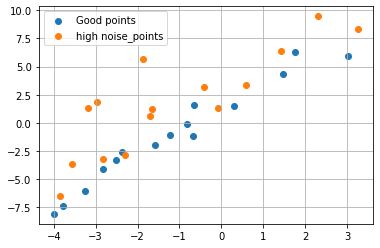

In [23]:
N = 15
np.random.seed(1)
x_good = np.random.uniform(-4, 4, N) 
y_good = true_func(x_good) + np.random.randn(N)

x_bad = np.random.uniform(-4, 4, N) 
y_bad = true_func(x_bad) + np.abs(np.random.randn(N)*4)

plt.scatter(x_good, y_good, label='Good points')
plt.scatter(x_bad, y_bad, label='high noise_points')
plt.grid()
plt.legend()

x_full = np.concatenate([x_good, x_bad])
y_full = np.concatenate([y_good, y_bad])

Now, let use define two weight metrices. One in the assumptione that all the points are equal. The latter will take into account the fact that second half of the objects in the dataset are more noisy.

In [24]:
X = np.stack([np.ones(2*N), x_full], 1)

v_none = np.diag(np.ones(2*N))
print(v_none[:3, :3])

v_smart = np.ones(2*N)
v_smart[:N] *= 4
v_smart = np.diag(v_smart)
print(v_smart[:3, :3])

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[4. 0. 0.]
 [0. 4. 0.]
 [0. 0. 4.]]


---
**Task 2.3** [1 pt] <a class="anchor" id="task2_3"></a>
Using weigth matrices `v_none` and `v_smart`, find optimal parameters of the weighted linear regressions. Call them `w_none` and `w_smart` correspondingly. 


In [25]:

# YOUR CODE HERE
w_none = weighted_lr(X, y_full, v_none)
w_smart = weighted_lr(X, y_full, v_smart)

In [26]:
print(w_none)
print(w_smart)

assert np.allclose(w_none[0], 2.4865, rtol=1e-3), 'First value of the `w_none` is wrong'
assert np.allclose(w_none[1], 1.9015, rtol=1e-3),  'Second value of the `w_none` is wrong'
assert np.allclose(w_smart[0], 1.7657, rtol=1e-3),  'First value of the `w_smart` is wrong'
assert np.allclose(w_smart[1],  2.0082, rtol=1e-3),  'Second value of the `w_smart` is wrong'

[2.48659221 1.90155953]
[1.76579771 2.00821624]


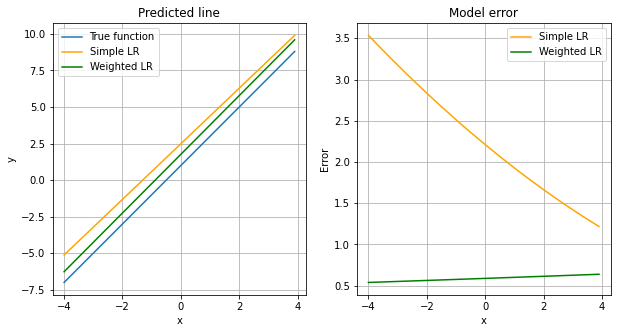

In [27]:
x_grid = np.arange(-4, 4, 0.1)
lr_predict = predict(np.stack([np.ones(x_grid.shape[0]), x_grid], 1), w_none)
wlr_predict = predict(np.stack([np.ones(x_grid.shape[0]), x_grid], 1), w_smart)

fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].plot(x_grid, true_func(x_grid), label='True function')
ax[0].plot(x_grid, lr_predict, label='Simple LR', c='Orange')
ax[0].plot(x_grid, wlr_predict, label='Weighted LR', c='Green')
ax[0].set_title('Predicted line')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

ax[1].plot(x_grid, (true_func(x_grid) - lr_predict) ** 2, label='Simple LR', c='Orange')
ax[1].plot(x_grid, (true_func(x_grid) - wlr_predict) ** 2, label='Weighted LR', c='Green')
ax[1].set_title('Model error')
ax[1].set_xlabel('x')
ax[1].set_ylabel('Error')

for i in ax:
    i.legend()
    i.grid()